In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
def f(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3 * (1 - (x / 7) ** 2) ** 0.5 / Z
    elif abs(x) > 1:
        return (
            (3 - abs(x)) / 2 -
            3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)
        ) / Z
    elif abs(x) > 0.75:
        return (9 - 8 * abs(x)) / Z
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    else:
        return 2.25 / Z

In [23]:
def proposal(x,s=2):
    return np.random.normal(loc=x,scale=s)

In [27]:
def metropolis(x):
    prop = proposal(x,2)
    
    acceptance = min(1, f(prop)/f(x))
    
    if np.random.random() < acceptance:
        return prop
    else:
        return x
    

In [58]:
def metropolis_simulation(x0, T=1000000):
    states = []
    x=x0
    for t in range(T):
        states.append(x)
        x = metropolis(x)
    
    return states
        
    

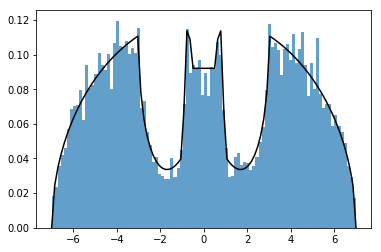

In [59]:
plt.hist(metropolis_simulation(0.5)[::100], bins=100,alpha=0.7, density=True)
plt.plot(np.linspace(-7,7,100),np.vectorize(f)(np.linspace(-7,7,100)), c='k')
plt.show()